Note that this notebook was automatically generated from an RDocumentation page. It depends on the package and the example code whether this code will run without errors. You may need to edit the code to make things work.

The following code reproduces continuous  simulations performed in the HSC boolean network from **Herrera et al. 2024. A system-Level Model Reveals that Transcriptional Stochasticity is Required for Hematopoietic Stem Cell Differentiation**. 

In [2]:
#install.packages('deSolve')
#install.packages('BoolNet')
library(deSolve)
library(ggplot2)
library(reshape2)
library(BoolNet)
net = loadNetwork('BoolNet_HSC_network.txt')
# define network parameters
parameters <- c(h = 50,gamma = 1)


In [3]:

initialState<-generateState(net,specs=c("Oxygen"=1,
										"GATA2"=1,
                                        "FOXO3"=1,
                                        "HIF1"=1,
                                        'p53'=1, 
                                        'AKT'=0,
                                        'OXPHOS'=0,
                                        'AMPK'=1,
                                        'GATA1'=0,
                                        'O2'=0,
                                        'Antioxidant'=1,
                                        'PU1'=0,
                                        "Cebpa"=0,
                                        "Ikzf1"=1,
                                        "Gfi1"=0,
                                        "Mef2c"=0,
                                        "mTOR"=0,
                                        "H2O2"=0,
                                        'SOD'=1,
                                        "Meis1"=1,
                                        "Runx1"=0))
# define SQUAD generic function
SQUAD<-function(x,w,gamma,h){
  val<- ((-exp(0.5*h) + exp(-h*(w-0.5))) / ((1-exp(0.5*h)) * (1+exp(-h*(w-0.5))))) - (gamma*x)
  return(val)
}

In [4]:
squadInteractions= function (t, state, parameters) {
    with(as.list(c(state, parameters)), {
		# Input nodes
        w_Oxygen = Oxygen
        w_Runx1 = min(max(max(PU1, GATA2), Runx1), 1 - Ikzf1)
        w_Meis1 = min(max(max(Meis1, Runx1), PU1), 1 - Gfi1)
        w_HIF1 = max(min(min(1 - Oxygen, O2), 1 - max(max(p53, 
            FOXO3), AMPK)), min(1 - Oxygen, Meis1))
        w_FOXO3 = min(min(AMPK, max(HIF1, p53)), 1 - max(AKT, 
            Cebpa))
        w_p53 = min(HIF1, 1 - max(max(AKT, GATA1), PU1))
        w_GATA2 = min(max(GATA2, p53), 1 - max(max(GATA1, PU1), 
            Gfi1))
        w_GATA1 = min(max(max(max(GATA1, GATA2), AKT), Runx1), 
            1 - max(max(PU1, p53), Ikzf1))
        w_PU1 = min(max(max(PU1, Runx1), min(Cebpa, Ikzf1)), 
            1 - max(max(GATA1, GATA2), Gfi1))
        w_Cebpa = min(min(PU1, Runx1), 1 - Mef2c)
        w_Ikzf1 = min(max(max(Mef2c, Ikzf1), Runx1), 1 - max(max(Cebpa, 
            PU1), GATA1))
        w_Gfi1 = min(max(Ikzf1, Cebpa), 1 - max(PU1, p53))
        w_Mef2c = min(PU1, 1 - Cebpa)
        w_mTOR = min(AKT, min(1 - AMPK, 1 - p53))
        w_AMPK = min(max(max(1 - AKT, 1 - OXPHOS), 1 - HIF1), 
            p53)
        w_AKT = max(H2O2, 1 - max(p53, FOXO3))
        w_H2O2 = max(max(min(min(SOD, O2), 1 - Antioxidant), 
            min(max(max(GATA1, HIF1), PU1), 1 - Antioxidant)), 
            min(OXPHOS, 1 - Antioxidant))
        w_O2 = max(1 - SOD, OXPHOS)
        w_SOD = max(p53, FOXO3)
        w_Antioxidant = max(p53, FOXO3)
        w_OXPHOS = min(max(mTOR, AKT), 1 - max(FOXO3, HIF1))
		
    	# Rates of Change
   	 	dOxygen = SQUAD(Oxygen,w_Oxygen,gamma,h)
    	dRunx1 = SQUAD(Runx1,w_Runx1,gamma,h)
    	dMeis1 = SQUAD(Meis1,w_Meis1,gamma,h)
    	dHIF1 = SQUAD(HIF1,w_HIF1,gamma,h)
    	dFOXO3 = SQUAD(FOXO3,w_FOXO3,gamma,h)
    	dp53 = SQUAD(p53,w_p53,gamma,h)
    	dGATA2 = SQUAD(GATA2,w_GATA2,gamma,h)
    	dGATA1 = SQUAD(GATA1,w_GATA1,gamma,h)
    	dPU1 = SQUAD(PU1,w_PU1,gamma,h)
    	dCebpa = SQUAD(Cebpa,w_Cebpa,gamma,h)
    	dIkzf1 = SQUAD(Ikzf1,w_Ikzf1,gamma,h)
    	dGfi1 = SQUAD(Gfi1,w_Gfi1,gamma,h)
    	dMef2c = SQUAD(Mef2c,w_Mef2c,gamma,h)
    	dmTOR = SQUAD(mTOR,w_mTOR,gamma,h)
    	dAMPK = SQUAD(AMPK,w_AMPK,gamma,h)
    	dAKT = SQUAD(AKT,w_AKT,gamma,h)
    	dH2O2 = SQUAD(H2O2,w_H2O2,gamma,h)
    	dO2 = SQUAD(O2,w_O2,gamma,h)
    	dSOD = SQUAD(SOD,w_SOD,gamma,h)
    	dAntioxidant = SQUAD(Antioxidant,w_Antioxidant,gamma,h)
    	dOXPHOS = SQUAD(OXPHOS,w_OXPHOS,gamma,h)
		
       return(list(c(dOxygen, dRunx1, dMeis1, dHIF1, dFOXO3, dp53, 
            dGATA2, dGATA1, dPU1, dCebpa, dIkzf1, dGfi1, dMef2c, 
            dmTOR, dAMPK, dAKT, dH2O2, dO2, dSOD, dAntioxidant, 
            dOXPHOS)))
    })
}

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


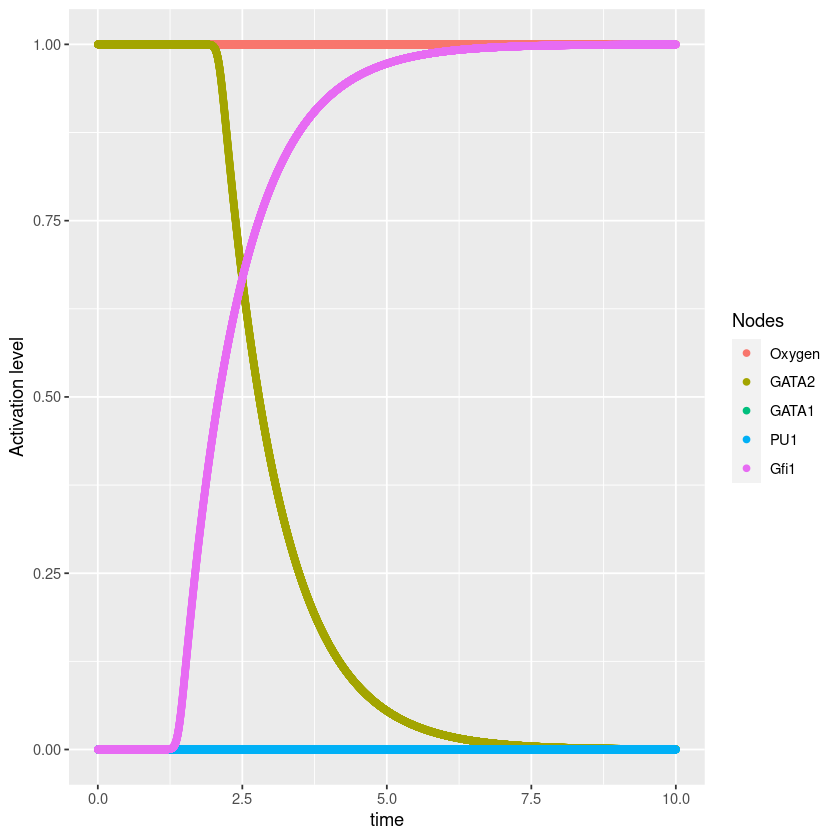

In [5]:
# define interval for numeric integration
times<-seq(0,10,0.001)

# simulate the same trajectory but in a continuous manner
result<-ode(y=initialState,times=times,func=squadInteractions,parms = parameters,atol=10e-6, rtol=10e-6)
result.df<-result.df<-melt(as.data.frame(result), id.vars="time")
# plot the results
plot<-qplot(time, value, data=result.df[(result.df$variable=='GATA2')|(result.df$variable=='GATA1')|(result.df$variable=='PU1')|(result.df$variable=='Gfi1')|(result.df$variable=='Oxygen'),], colour=variable)
plot<-plot+labs(colour="Nodes", y="Activation level")
plot